In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [4]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [5]:
pd.set_option('display.max_columns',200)

In [5]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [11]:
df.shape

(7728394, 46)

In [12]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


## Question till now
1. Are ther more accidents in warmer or colder areas?
1. Which staes are most accident prone? Check per capita info 
1. Among top 100 cities , which state do they belog to
1. What weather type and temprature has most accidents

In [16]:
numerical=['int16','int32','int64','float16','float32','float64']
c=0
for col in df.columns:
    if df[col].dtype in numerical:
        c=c+1
print(c)

num_df=df.select_dtypes(include=numerical)
print(len(num_df.columns))

13
13


In [21]:
missing_percent = df.isna().sum().sort_values(ascending=False)

In [23]:
missing_percentage = missing_percent/len(df)*100

In [24]:
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [28]:
missing_percentage = missing_percentage[missing_percentage!=0] # colums with non zero values

# Graph of percentage of null value in columns

<Axes: >

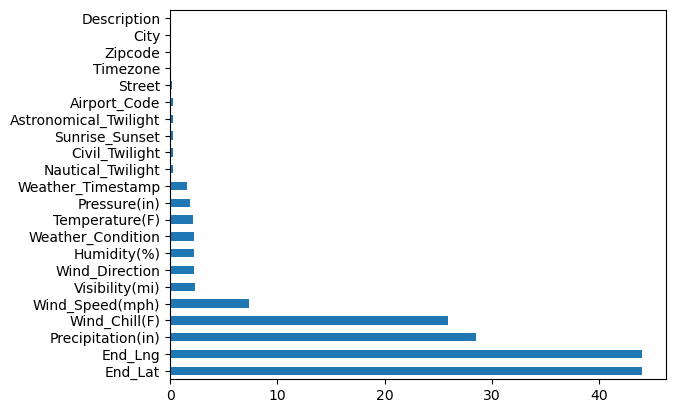

In [29]:
missing_percentage.plot(kind='barh')

# Remove unused columns


In [62]:
top_cityies = df.City.value_counts().sort_values(ascending=False).head(10)

In [64]:
df.query('City=="New York"').head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194401,A-194408,Source2,2,2016-12-01 08:21:11,2016-12-01 08:50:48,40.770107,-73.957397,NaN,NaN,0.01,Accident school bus involved on 2nd Ave both w...,E 74th St,New York,New York,NY,10021-3790,US,US/Eastern,KNYC,2016-12-01 07:51:00,52.0,NaN,80.0,29.61,10.0,West,5.8,NaN,Mostly Cloudy,True,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
194415,A-194422,Source2,3,2016-12-01 08:49:35,2016-12-01 09:19:14,40.849579,-73.942314,NaN,NaN,1.13,Center lane blocked due to accident on I-95 Ge...,George Washington Brg,New York,New York,NY,10033,US,US/Eastern,KNYC,2016-12-01 08:51:00,52.0,NaN,66.0,29.63,10.0,West,9.2,NaN,Clear,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
194468,A-194475,Source2,2,2016-12-01 12:08:26,2016-12-01 12:37:55,40.748028,-73.968170,NaN,NaN,0.01,Two lanes blocked due to accident on FDR Dr No...,FDR Dr S,New York,New York,NY,10017,US,US/Eastern,KNYC,2016-12-01 11:51:00,53.1,NaN,50.0,29.64,10.0,North,NaN,NaN,Clear,False,False,False,False,True,False,False,False,False,True,False,False,False,Day,Day,Day,Day
194533,A-194540,Source2,2,2016-12-02 05:19:11,2016-12-02 05:49:02,40.761723,-73.982803,NaN,NaN,0.01,Accident on 51st St at 7th Ave.,7th Ave,New York,New York,NY,10019-6806,US,US/Eastern,KNYC,2016-12-02 04:51:00,39.9,33.9,60.0,29.88,10.0,West,9.2,NaN,Partly Cloudy,True,False,True,False,False,False,False,False,False,False,False,True,False,Night,Night,Night,Night
194551,A-194558,Source3,2,2016-12-02 07:09:04,2016-12-02 07:38:36,40.782818,-73.943871,NaN,NaN,0.01,Center lane blocked due to accident on FDR Dr ...,E 96th St,New York,New York,NY,10128,US,US/Eastern,KNYC,2016-12-02 06:51:00,41.0,38.0,60.0,29.90,10.0,Variable,4.6,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [74]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

for st in df.State.unique():
    if st in states:
        continue
    else:
        print(st)
len(states)
df.query('City=="Abbeville"').State.unique()

DC


array(['SC', 'AL', 'LA', 'MS'], dtype=object)

<Axes: >

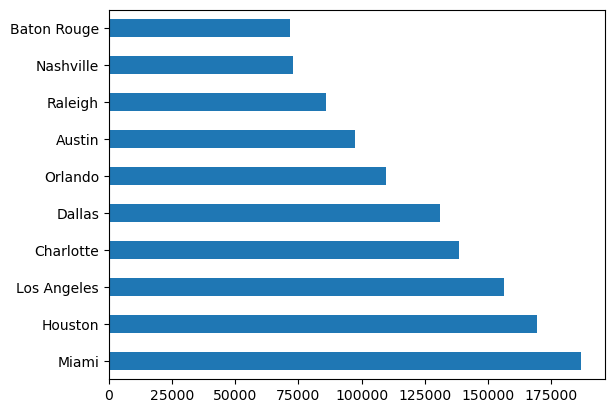

In [63]:
top_cityies.plot(kind='barh')

In [26]:
# top_cs=df[['City','State','Temperature(F)','Weather_Condition']]
t=top_cs.groupby(['City']).value_counts().loc[lambda x:x>1000].to_frame()
t

0
City       State Temperature(F) Weather_Condition      
Charlotte  NC    81.0           Mostly Cloudy      1130
                 75.0           Mostly Cloudy      1049
                 73.0           Mostly Cloudy      1012
                                Fair               1005
                 79.0           Mostly Cloudy      1004
...                                                 ...
Orlando    FL    80.0           Mostly Cloudy      1010
Sacramento CA    63.0           Fair               1193
                 61.0           Fair               1123
                 64.0           Fair               1028
                 59.0           Fair               1013

[142 rows x 1 columns]

In [27]:
new_df = t.reset_index()
new_df.columns = ['City','State','Temperature(F)','Weather_Condition','Count']
new_df

,City,State,Temperature(F),Weather_Condition,Count
0,Charlotte,NC,81.0,Mostly Cloudy,1130
1,Charlotte,NC,75.0,Mostly Cloudy,1049
2,Charlotte,NC,73.0,Mostly Cloudy,1012
3,Charlotte,NC,73.0,Fair,1005
4,Charlotte,NC,79.0,Mostly Cloudy,1004
...,...,...,...,...,...
137,Orlando,FL,80.0,Mostly Cloudy,1010
138,Sacramento,CA,63.0,Fair,1193
139,Sacramento,CA,61.0,Fair,1123
140,Sacramento,CA,64.0,Fair,1028


In [37]:
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

new_df['Count'] = new_df['Count'].astype('float64')
new_df.dtypes

City                  object
State                 object
Temperature(F)       float64
Weather_Condition     object
Count                float64
dtype: object

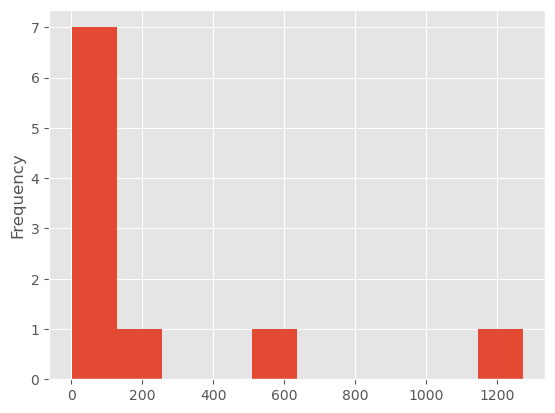

In [101]:
t.value_counts(dropna=True).head(10).plot(kind='hist')
plt.show()

['Charlotte' 'Dallas' 'Houston' 'Los Angeles' 'Miami' 'Orlando'
 'Sacramento']


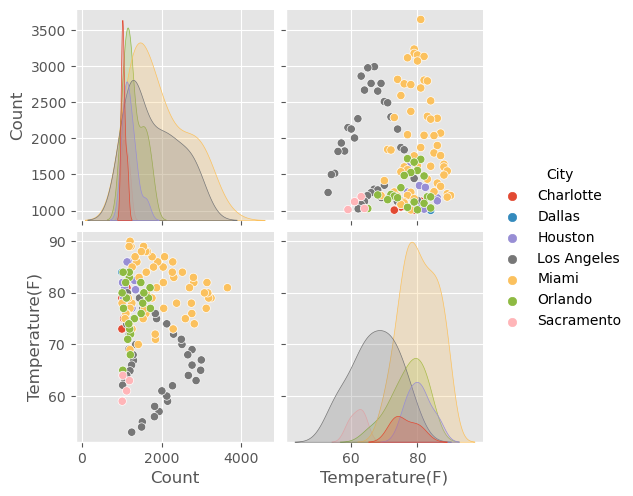

In [43]:
print(new_df.City.unique())
ax = sns.pairplot(vars=['Count','Temperature(F)'],hue='City',data=new_df)
ax

In [49]:
cityDF = df['City'].value_counts().loc[lambda x:x>10000]
city_df = cityDF.reset_index()
city_df.columns = ['City','Count']
city_df

,City,Count
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
...,...,...
100,Henrico,10293
101,Buffalo,10279
102,West Palm Beach,10169
103,Fremont,10051


In [65]:
# meta_df=df[['City','State']].groupby('City')
meta_df = pd.DataFrame({'count' : df.groupby( [ 'City','State'] ).size()}).reset_index().sort_values(by='count',ascending=False).reset_index()
meta_df.heaad(100)

# top100_df = pd.concat([city_df,meta_df],ignore_index=True,join='inner')
# top100_df = city_df.merge(meta_df,how='left',on='City')
# top100_df

,index,City,State,count
0,11609,Miami,FL,186768
1,8484,Houston,TX,169428
2,10474,Los Angeles,CA,156491
3,3125,Charlotte,NC,138345
4,4339,Dallas,TX,130303
...,...,...,...,...
20318,2298,Bucksport,ME,1
20319,2296,Buckner,IL,1
20320,3910,Coral,PA,1
20321,1412,Berlin township,NJ,1
